## Ranking Analysis

## To-dos: Carlotta
Bisher war df_regions das Test-Dataframe
- Analyse-Schritte für andere think-tanks ebenfalls durchführen
- Kategorien finden die über min. 5 Jahre ein stablies Ranking (ü. 75 think-tanks pro Jahr) enthalten

In [30]:
##import libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## create Function 1

In [2]:
def get_list_element(val):
    #print(type(val))
    if isinstance(val, list):
        return int(val[0])
    else:
        return int(val)

In [3]:
#file_path
file_path = '../results/tts_conslidated_categories.xlsx'

In [4]:
#import datasets
df_regions = pd.read_excel(file_path,sheet_name='regions',index=False)
df_research = pd.read_excel(file_path,sheet_name='research_areas',index=False)
df_special = pd.read_excel(file_path,sheet_name='special',index=False)

# Regions
Als erstes arbeiten wir mit df_regions: 

In [7]:
df_regions.head()

,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category
0,1,brookings institution (united states),Top 30 Think Tanks United States,2008,United States,['(united states)'],brookings institution,Top Think Tanks in the United States
1,2,council on foreign relations,Top 30 Think Tanks United States,2008,United States,[],council on foreign relations,Top Think Tanks in the United States
2,3,carnegie endowment for international peace,Top 30 Think Tanks United States,2008,United States,[],carnegie endowment for international peace,Top Think Tanks in the United States
3,4,rand corporation,Top 30 Think Tanks United States,2008,United States,[],rand corporation,Top Think Tanks in the United States
4,5,heritage foundation,Top 30 Think Tanks United States,2008,United States,[],heritage foundation,Top Think Tanks in the United States


## Analyse: 

Oben haben wir gesehen, dass wir jetzt ein Dataframe mit den Spalten "clean_tt" (vereinheitlichte und saubere Think Tank Namen) und "cleaned_category" (vereinheitlichte und saubere Kategorie-Namen) haben. 
Jetzt wollen wir genauer herausfinden, wie diese cleaned categories aussehen und wieviele Think Tanks sie jährlich beinhalten. Das lassen wir uns dann mithilfe einer Pivot-Tabelle anzeigen (table_regions in Zeile [9]). 
In dieser Tabelle könenn wir dann ablesen welche Kategorien über alle oder zumindest viele Jahre eine große Zahl von Think Tanks beinhalten. Diese eignen sich dann für die Positiosnwechsel-Analyse, die wir später machen wollen. 

In [8]:
#Übersicht wie viele think-tanks pro Jahr pro Kategorie
table_regions = pd.pivot_table(df_regions, values='clean_tt', index=['cleaned_category'], columns=['Year'], 
               aggfunc=lambda x: len(x.unique()))

In [9]:
table_regions

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cleaned_category,,,,,,,,,,,
Top 25 Think Tanks in Eastern Europe,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Latin America and the Caribbean,30.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in North America (Non-US),24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Southern Africa (including Sub-Saharan Africa),26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Southern Africa (including sub-Saharan Africa),NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Top 40 Think Tanks in Asia (Excluding China, India, Japan, and the Republic of Korea)",NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN
Top 40 Think Tanks in Latin America and the Caribbean,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 45 Think Tanks in South and Central America,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN
Top Think Tank in the World,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In der Tabelle sehen wir, dass zum Beispiel die Kategorie "Top Think Tanks Worldwide (US and non-US)" seit 2009 im Ranking ist und seit 2012 min. 150 Think Tanks beinhaltet. Damit ist sie gut für die weiteren Analysen geeignet. 
Wir wählen diese aus um einen ersten Testlauf zu starten. 

In [10]:
# Spalte auswählen:
table_regions.loc['Top Think Tanks Worldwide (US and non-US) ']

Year
2008      NaN
2009     25.0
2010     25.0
2011     30.0
2012    150.0
2013    150.0
2014    150.0
2015    172.0
2016    173.0
2017    172.0
2018    175.0
Name: Top Think Tanks Worldwide (US and non-US) , dtype: float64

Da wir oben sehen, dass die Kategorie gut geeignet ist, erstellen wir ein Dataframe für die Kategorie. 

In [11]:
#get dataframe for category: Top Think Tanks Worldwide (US and non-US)
test_worldwide = df_regions[df_regions['cleaned_category']=='Top Think Tanks Worldwide (US and non-US) ']

Jetzt erstellen wir eine Liste in der die Kategorie nach Jahren gruppiert wird und jedes Jahr einen Index erhält. Wenn man den jeweiligen Index in die eckigen Klammern schreibt, wird einem das Dataframe für das ausgewählte Jahr ausgegeben. Da die Kategorie "Top Think Tanks Worldwide (US and non-US)" erst seit 2009 existiert, beginnt der Index auch beim Jahr 2009. 
(0=2009, 1=2010, 2=2011, ...) 

In [12]:
list_worldwide = []
for year, df_year in test_worldwide.groupby('Year'):
    #name the dataframe
    df_year.index.name=year
    #append dataframe to list
    list_worldwide.append(df_year)

In [31]:
#you can access each dataframe by indexing the list:
list_worldwide[2].head()

,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category
2011,,,,,,,,
909,1,brookings institution (united states),Top Thirty Think Tanks â€“ Worldwide (US and N...,2011,United States,['(united states)'],brookings institution,Top Think Tanks Worldwide (US and non-US)
910,2,chatham house (ch) royal institute of internat...,Top Thirty Think Tanks â€“ Worldwide (US and N...,2011,United States,['(ch)'],chatham house royal institute of internationa...,Top Think Tanks Worldwide (US and non-US)
911,3,carnegie endowment for international peace (un...,Top Thirty Think Tanks â€“ Worldwide (US and N...,2011,United States,['(united states)'],carnegie endowment for international peace,Top Think Tanks Worldwide (US and non-US)
912,4,council on foreign relations (cfr) (united sta...,Top Thirty Think Tanks â€“ Worldwide (US and N...,2011,United States,"['(cfr)', '(united states)']",council on foreign relations,Top Think Tanks Worldwide (US and non-US)
913,5,center for strategic and international studies...,Top Thirty Think Tanks â€“ Worldwide (US and N...,2011,United States,"['(csis)', '(united states)']",center for strategic and international studies,Top Think Tanks Worldwide (US and non-US)


Die Anzahl der Think Tanks pro Jahr in der Kategorie verändert sich und wird immer größer. Wir wollen aber eine einheitliche Anzahl von Think Tanks für alle Jahre haben. Daher werfen wir alle Jahre raus, in denen es weniger als 150 Think Tanks in der Kategorie gibt und legen für die restlichen Jahre fest, dass es auch nur maximal 150 Think Tanks sein sollen. 
Nach dem wir diese Liste (final_list) erstellt haben, checken wir die Anzahl der Jahre, die jetzt noch dabei sind. Wir wissen, dass erst seit 2012 150 Think Tanks in der Kategorie gerankt sind. 7 ist daher die richtige Anzahl an Jahren.  

In [20]:
#drop years with too little values and set them to equal length of 150:
final_list = []
for l in list_worldwide:
    if len(l)>149.0:
        l = l.head(150).reset_index()
        final_list.append(l)
        
len(final_list)

7

Jetzt können wir uns wieder mit Hilfe des Index in den eckigen Klammern das Dataframe für die verschiedenen Jahre ausgeben lassen. 

In [32]:
final_list[0].head()

,2012,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category
0,1319,1,brookings institution (united states),Top 150 Think Tanks â€“ Worldwide (US and Non-...,2012,United States,['(united states)'],brookings institution,Top Think Tanks Worldwide (US and non-US)
1,1320,2,chatham house (united kingdom),Top 150 Think Tanks â€“ Worldwide (US and Non-...,2012,United States,['(united kingdom)'],chatham,Top Think Tanks Worldwide (US and non-US)
2,1321,3,carnegie endowment for international peace (un...,Top 150 Think Tanks â€“ Worldwide (US and Non-...,2012,United States,['(united states)'],carnegie endowment for international peace,Top Think Tanks Worldwide (US and non-US)
3,1322,4,stockholm international peace research institu...,Top 150 Think Tanks â€“ Worldwide (US and Non-...,2012,Sweden,"['(sipri)', '(sweden)']",stockholm international peace research institute,Top Think Tanks Worldwide (US and non-US)
4,1323,5,center for strategic and international studies...,Top 150 Think Tanks â€“ Worldwide (US and Non-...,2012,United States,['(united states)'],center for strategic and international studies,Top Think Tanks Worldwide (US and non-US)


## Create groups 

Wir wollen aber nicht nur die Veränderungen in der Kategorie über die Jahre analysieren sondern auch schauen ob sich in der Kategorie eher in den oberen oder den unteren Bereichen mehr verändert. Um das sehen zu können müssen wir die Dataframes für die einzelnen Jahre in Gruppen (in diesem Fall Dezile) einteilen 2. 
So bilden wir 10 Gruppen mit jeweils 15 Think Tanks. 

In [22]:
#create a list of datasets. each datasets split-rearranged by groups:
list_dz_dfs = []
for f in final_list:
    dz_df = np.array_split(f, 10)
    dz_list = []
    for idx,group in enumerate(dz_df):
        group['dezil'] = idx+1
        dz_list.append(group)
    dz_all = pd.concat(dz_list)
    list_dz_dfs.append(dz_all)

In [23]:
list_dz_dfs[1].head(30)

,2013,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category,dezil
0,2440,1,brookings institution (united states),Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],brookings institution,Top Think Tanks Worldwide (US and non-US),1
1,2441,2,chatham house (united kingdom),Top Think Tanks Worldwide (US and non-US),2013,United States,['(united kingdom)'],chatham,Top Think Tanks Worldwide (US and non-US),1
2,2442,3,carnegie endowment for international peace (un...,Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],carnegie endowment for international peace,Top Think Tanks Worldwide (US and non-US),1
3,2443,4,center for strategic and international studies...,Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],center for strategic and international studies,Top Think Tanks Worldwide (US and non-US),1
4,2444,5,stockholm international peace research institu...,Top Think Tanks Worldwide (US and non-US),2013,Sweden,"['(sipri)', '(sweden)']",stockholm international peace research institute,Top Think Tanks Worldwide (US and non-US),1
5,2445,6,bruegel (belgium),Top Think Tanks Worldwide (US and non-US),2013,Belgium,['(belgium)'],bruegel,Top Think Tanks Worldwide (US and non-US),1
6,2446,7,council on foreign relations (united states),Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],council on foreign relations,Top Think Tanks Worldwide (US and non-US),1
7,2447,8,rand corporation (united states),Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],rand corporation,Top Think Tanks Worldwide (US and non-US),1
8,2448,9,international institute for strategic studies ...,Top Think Tanks Worldwide (US and non-US),2013,United Kingdom,"['(iiss)', '(united kingdom)']",international institute for strategic studies,Top Think Tanks Worldwide (US and non-US),1
9,2449,10,woodrow wilson international center for schola...,Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],woodrow wilson international center for scholars,Top Think Tanks Worldwide (US and non-US),1


## 2: overview of datasets:

In [24]:
#how many think-tanks in total in this category?
top_ww_all = pd.concat(list_dz_dfs)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


7 Jahre x 150 Ranks = 1050 Ranks Das zeigt uns wieviele Ranks es insgesamt in allen 7 Jahren gab. 

In [26]:
len(top_ww_all)

1050

Und wieviele Think Tanks wurden im Laufe der 7 Jahre gerankt? 

In [25]:
#this is the number of think-tanks that have been listed over 7 years within the ranking:
len(top_ww_all['clean_tt'].value_counts())

204

Das zeigt schon, dass es keine sehr große Anzahl von Think Tanks war. Es kamen also nur 54 Think Tanks im Laufe der Jahre dazu, da ja 150 die Ausgangsmenge war. 
Wir wollen aber genauer wissen, wie stark sich die Rankingposition geändert haben. 
Dazu erstellen wir eine Tabelle, die uns für jeden Think Tank zeigt in welcher der 10 Dezile er von 2012 bis 2018 auftaucht. 

In [159]:
top_ww_all.groupby(['clean_tt','Year'])

table_top_ww_all = pd.pivot_table(top_ww_all, values='dezil', index=['clean_tt'], columns=['Year'], 
               aggfunc=lambda x: list(x))

In [160]:
table_top_ww_all

Year,2012,2013,2014,2015,2016,2017,2018
clean_tt,,,,,,,
adam smith institute,NaN,NaN,NaN,[9],[9],[9],[9]
african centre for technology studies,[7],NaN,NaN,NaN,NaN,NaN,NaN
african centre for the constructive resolution of disputes,[5],[5],[5],[5],[5],[3],[3]
african economic research consortium,[5],[5],[5],[5],[5],[5],[5]
african technology policy studies network,[7],[7],[7],[7],[7],[7],[7]
al-ahram center for political and strategic studies,[4],[4],[4],[4],[4],[4],[4]
american enterprise institute for public policy research,[2],[2],[2],[2],[2],[3],[3]
amnesty international,[1],[1],[1],[1],[2],[3],[3]
asia society policy institute,NaN,NaN,NaN,[10],[9],[8],[8]


In [118]:
#table_top_ww_all[table_top_ww_all['Year']==2008]

Wieviele Think Tanks tauchen in den Dezilen in allen 7 Jahren auf? Es sind mindestens 15, da jedes Dezil aus 15 Think Tanks besteht. Wie viele "neue" Think Tanks kommen also im Laufe der Jahre dazu? 

In [27]:
#An initial approach: how many unique think-tanks per decile, over the years?
dz_years = top_ww_all.groupby('dezil')['clean_tt'].nunique()

In [28]:
dz_years

dezil
1     22
2     34
3     37
4     38
5     37
6     37
7     34
8     31
9     35
10    42
Name: clean_tt, dtype: int64

dz_years zeigt, dass im ersten Dezil tatsächlich am wenigsten neue Think Tanks dazu kommen (nur 7). Das Dezil mit den meisten dazugekommenen Think Tanks ist das 10 (27). 
Dieser Verlauf wird im Plot unten visualisiert. 

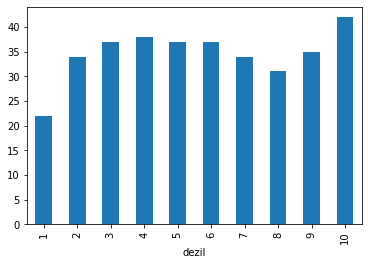

In [29]:
dz_years.plot.bar(x='dezil', y='unique think tanks (2012-18)')
#dz_years.plot(color='orange')

dezil
1     29
2     45
3     42
4     49
5     44
6     47
7     49
8     43
9     50
10    54
Name: Think Tank, dtype: int64

In [166]:
sanky = table_top_ww_all[[2012,2018]]
sanky = sanky.fillna(0)

sanky[2012] = sanky[2012].apply(get_list_element)
sanky[2018] = sanky[2018].apply(get_list_element)
sanky['value'] = 1

In [168]:
sanky_export = sanky.groupby([2012,2018]).size().reset_index().rename(columns={0:'count'})
sanky_export

,2012,2018,count
0,0,0,13
1,0,1,1
2,0,2,3
3,0,3,2
4,0,4,4
5,0,5,4
6,0,6,3
7,0,7,4
8,0,8,7
9,0,9,5


In [169]:
sanky_export.reset_index().to_csv('../results/sanky_test.csv',index_label=False,index=False)

 Auf dieser Seite kann man Sanky Diagrams erstellen: 
 https://chart-studio.plot.ly

# Research 


In [33]:
df_research.head()

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category
0,0,brookings institution (united states),Top Education Policy Think Tanks (Unranked and...,2012,United States,['(united states)'],brookings institution,Top Education Policy Think Tanks (Unranked and...
1,0,brown center on education policy (united states),Top Education Policy Think Tanks (Unranked and...,2012,United States,['(united states)'],brown center on education policy,Top Education Policy Think Tanks (Unranked and...
2,0,cato institute (united states),Top Education Policy Think Tanks (Unranked and...,2012,United States,['(united states)'],cato institute,Top Education Policy Think Tanks (Unranked and...
3,0,center for american progress (united states),Top Education Policy Think Tanks (Unranked and...,2012,United States,['(united states)'],center for american progress,Top Education Policy Think Tanks (Unranked and...
4,0,center for democratic education (albania),Top Education Policy Think Tanks (Unranked and...,2012,Albania,['(albania)'],center for democratic education,Top Education Policy Think Tanks (Unranked and...


## Analyse

In [47]:
#Übersicht wie viele think-tanks pro Jahr pro Kategorie
table_research = pd.pivot_table(df_research, values='origin_tt_name', index=['Category'], columns=['Year'], 
               aggfunc=lambda x: len(x.unique()))

In [48]:
table_research

Year,2012,2013,2014,2015,2016,2017,2018
Category,,,,,,,
List of Food Security Think Tanks (Alphabetical Listing not ranked),NaN,NaN,NaN,NaN,NaN,NaN,133.0
List of Water Security Think Tanks (Alphabetical Listing not ranked),NaN,NaN,NaN,NaN,NaN,NaN,77.0
Top Education Policy Think Tanks,NaN,50.0,NaN,NaN,NaN,NaN,NaN
Top Defense and National Security,NaN,NaN,NaN,106.0,108.0,104.0,111.0
Top Defense and National Security Think Tanks,NaN,65.0,84.0,NaN,NaN,NaN,NaN
Top Domestic Economic Policy Think Tanks,NaN,80.0,80.0,131.0,133.0,137.0,145.0
Top Domestic Health Policy Think Tanks,NaN,NaN,30.0,55.0,55.0,55.0,NaN
Top Education Policy Think Tanks,NaN,NaN,55.0,65.0,65.0,61.0,65.0
Top Education Policy Think Tanks (Unranked and in Alphabetical order),51.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Spalte auswählen:
table_research.loc['']

## Special Categories 

In [38]:
df_special.head()

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category
0,1,european council on foreign relations belgium,Best New Think Tank (established in the last t...,2008,Belgium,[],european council on foreign relations,Best New Think Tank (established in the last t...
1,2,bruegel (belgium),Best New Think Tank (established in the last t...,2008,Belgium,['(belgium)'],bruegel,Best New Think Tank (established in the last t...
2,3,"center for american progress, us",Best New Think Tank (established in the last t...,2008,United States,[],"center for american progress,",Best New Think Tank (established in the last t...
3,1,european council on foreign relations belgium,Best New Think Tank (established in the last t...,2009,Belgium,[],european council on foreign relations,Best New Think Tank (established in the last t...
4,2,"center for american progress, us",Best New Think Tank (established in the last t...,2009,United States,[],"center for american progress,",Best New Think Tank (established in the last t...


In [39]:
#Übersicht wie viele think-tanks pro Jahr pro Kategorie
table_special = pd.pivot_table(df_special, values='clean_tt', index=['cleaned_category'], columns=['Year'], 
               aggfunc=lambda x: len(x.unique()))

In [40]:
table_special

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cleaned_category,,,,,,,,,,,
Best Advocay Campaign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0
Best Government Affiliated Think Tanks,NaN,NaN,20.0,30.0,39.0,40.0,44.0,1.0,71.0,71.0,72.0
Best Independent Think Tanks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,145.0,143.0
"Best Independent Think Tanks(Category not in rank order, institutions were nominated but not ranked and are listed in Alphabetical order)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,NaN,NaN,NaN
Best Managed Think Tanks,NaN,NaN,NaN,NaN,NaN,60.0,65.0,79.0,79.0,78.0,75.0
Best New Idea or Paradigm Developed by a Think Tank,NaN,NaN,NaN,NaN,NaN,40.0,40.0,60.0,65.0,64.0,65.0
Best New Think Tank,NaN,NaN,NaN,NaN,NaN,10.0,27.0,NaN,NaN,NaN,NaN
Best New Think Tank (established in the last three-five years),3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Best New Think Tanks (Established in the last 18 months),NaN,NaN,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
